In [205]:
import pandas as pd

# Percorso del file CSV
file_path = 'imdb_top_1000.csv'

# Caricamento dei dati nel DataFrame
df = pd.read_csv(file_path)

#le prime righe del DataFrame per confermare
print(df.head())

                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [206]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [207]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [209]:
df_pieno = df["Gross"].dropna()
df_pieno

0       28,341,469
1      134,966,411
2      534,858,444
3       57,300,000
4        4,360,000
          ...     
990        696,690
991      1,378,435
992    141,843,612
994     13,780,024
997     30,500,000
Name: Gross, Length: 831, dtype: object

In [210]:
 df_pieno = df_pieno.str.replace(",", "").astype(int)
 df_pieno
media_gross = df_pieno[1].mean().astype(float)
media_gross

134966411.0

In [211]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())
df['Gross'] = df['Gross'].str.replace(",", "").astype(float)
df['Gross'] = df['Gross'].fillna(media_gross)
# df.isnull().sum()
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,134966411.0
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,134966411.0
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,134966411.0


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


In [213]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.00000,1.000000e+03,1.000000e+03
mean,7.949300,77.97153,2.736929e+05,7.934620e+07
std,0.275491,11.36206,3.273727e+05,1.031368e+08
min,7.600000,28.00000,2.508800e+04,1.305000e+03
25%,7.700000,72.00000,5.552625e+04,5.012919e+06
50%,7.900000,77.97153,1.385485e+05,4.238945e+07
75%,8.100000,85.25000,3.741612e+05,1.349664e+08
max,9.300000,100.00000,2.343110e+06,9.366622e+08


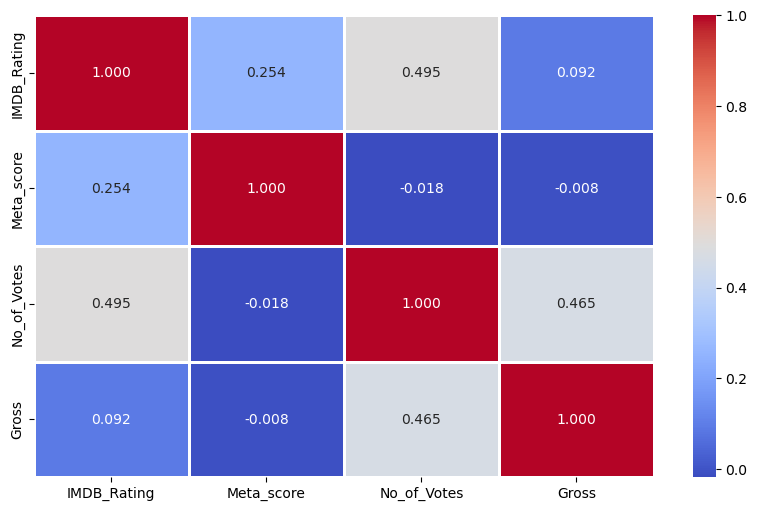

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.select_dtypes(include=["number"]).corr()
correlation_matrix
plt.figure(figsize =(10,6))
sns.heatmap(correlation_matrix, annot = True, cmap ="coolwarm", fmt = ".3f", linewidths =1)
plt.show()

In [215]:
mean_Gross_byGenre = df.groupby(df['Genre'].str.split(",", n=1).str[0])['Gross'].mean()
mean_Gross_byGenre

Genre
Action       1.407021e+08
Adventure    9.386646e+07
Animation    1.292478e+08
Biography    6.778259e+07
Comedy       5.038003e+07
Crime        4.737677e+07
Drama        5.700220e+07
Family       2.195553e+08
Fantasy      1.349664e+08
Film-Noir    4.584122e+07
Horror       7.916583e+07
Mystery      5.657125e+07
Thriller     1.755074e+07
Western      1.455538e+07
Name: Gross, dtype: float64

In [216]:
df['IMDBGroup'] = pd.cut(df['IMDB_Rating'], bins=[7.6, 8.0, 8.5, 9.0, 9.3], right=False)
mean_Gross_byIMDB = df.groupby('IMDBGroup')['Gross'].mean()
mean_Gross_byIMDB

C:\Users\Marco.DESKTOP-6H5852Q\AppData\Local\Temp\ipykernel_16116\3202153820.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_Gross_byIMDB = df.groupby('IMDBGroup')['Gross'].mean()


IMDBGroup
[7.6, 8.0)    7.537216e+07
[8.0, 8.5)    7.799891e+07
[8.5, 9.0)    1.277494e+08
[9.0, 9.3)    1.828712e+08
Name: Gross, dtype: float64

In [217]:
df['Runtime'] = df['Runtime'].str.replace(" min", "").astype(int)

In [218]:
df[df["Gross"] == df["Gross"].min()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDBGroup
630,https://m.media-amazon.com/images/M/MV5BMTU4NT...,Adams æbler,2005,R,94,"Comedy, Crime, Drama",7.8,A neo-nazi sentenced to community service at a...,51.0,Anders Thomas Jensen,Ulrich Thomsen,Mads Mikkelsen,Nicolas Bro,Paprika Steen,45717,1305.0,"[7.6, 8.0)"


In [219]:
df[df["Gross"] == df["Gross"].max()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDBGroup
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0,"[7.6, 8.0)"


In [220]:
has_duplicates = df['Series_Title'].duplicated().any()
has_duplicates

True

In [221]:
duplicate_rows = df[df['Series_Title'].duplicated()]
duplicate_rows

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDBGroup
136,https://m.media-amazon.com/images/M/MV5BYmJhZm...,Drishyam,2015,UA,163,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,77.97153,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,739478.0,"[8.0, 8.5)"


In [222]:
duplicates_by_id = df[df.duplicated(subset=['Series_Title'], keep=False)]
duplicates_by_id

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDBGroup
87,https://m.media-amazon.com/images/M/MV5BYmY3Mz...,Drishyam,2013,U,160,"Crime, Drama, Thriller",8.3,A man goes to extreme lengths to save his fami...,77.97153,Jeethu Joseph,Mohanlal,Meena,Asha Sharath,Ansiba,30722,134966411.0,"[8.0, 8.5)"
136,https://m.media-amazon.com/images/M/MV5BYmJhZm...,Drishyam,2015,UA,163,"Crime, Drama, Mystery",8.2,Desperate measures are taken by a man who trie...,77.97153,Nishikant Kamat,Ajay Devgn,Shriya Saran,Tabu,Rajat Kapoor,70367,739478.0,"[8.0, 8.5)"


In [223]:
registi_presenti = df['Director'].value_counts()
registi_presenti

Director
Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Neill Blomkamp       1
Tomas Alfredson      1
Duncan Jones         1
Jacques Audiard      1
George Stevens       1
Name: count, Length: 548, dtype: int64

In [224]:
gen_freq = df['Genre'].str.split(",", n=1).str[0].value_counts()
gen_freq

Genre
Drama        289
Action       172
Comedy       155
Crime        107
Biography     88
Animation     82
Adventure     72
Mystery       12
Horror        11
Western        4
Film-Noir      3
Fantasy        2
Family         2
Thriller       1
Name: count, dtype: int64

In [225]:
gen_freq2 = df['Genre'].value_counts()
gen_freq2

Genre
Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64

In [226]:
df['Certificate'].unique()

array(['A', 'UA', 'U', 'PG-13', 'R', nan, 'PG', 'G', 'Passed', 'TV-14',
       '16', 'TV-MA', 'Unrated', 'GP', 'Approved', 'TV-PG', 'U/A'],
      dtype=object)

In [227]:
df['Certificate'] = df['Certificate'].fillna('Unrated')
cert_freq = df['Certificate'].value_counts()
cert_freq

Certificate
U           234
A           197
UA          175
R           146
Unrated     102
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
U/A           1
Name: count, dtype: int64

In [228]:
top_IMDB = df[df ['IMDB_Rating'] > 8.5]
sorted_top = top_IMDB.sort_values('IMDB_Rating', ascending=True)
sorted_top

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDBGroup
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.00000,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,134966411.0,"[8.5, 9.0)"
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,Unrated,133,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85.00000,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,134966411.0,"[8.5, 9.0)"
29,https://m.media-amazon.com/images/M/MV5BNzVlY2...,Star Wars,1977,UA,121,"Action, Adventure, Fantasy",8.6,Luke Skywalker joins forces with a Jedi Knight...,90.00000,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness,1231473,322740140.0,"[8.5, 9.0)"
28,https://m.media-amazon.com/images/M/MV5BNjNhZT...,The Silence of the Lambs,1991,A,118,"Crime, Drama, Thriller",8.6,A young F.B.I. cadet must receive the help of ...,85.00000,Jonathan Demme,Jodie Foster,Anthony Hopkins,Lawrence A. Bonney,Kasi Lemmons,1270197,130742922.0,"[8.5, 9.0)"
27,https://m.media-amazon.com/images/M/MV5BOTUwOD...,Se7en,1995,A,127,"Crime, Drama, Mystery",8.6,"Two detectives, a rookie and a veteran, hunt a...",65.00000,David Fincher,Morgan Freeman,Brad Pitt,Kevin Spacey,Andrew Kevin Walker,1445096,100125643.0,"[8.5, 9.0)"
26,https://m.media-amazon.com/images/M/MV5BYmJmM2...,La vita è bella,1997,U,116,"Comedy, Drama, Romance",8.6,When an open-minded Jewish librarian and his s...,59.00000,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano,623629,57598247.0,"[8.5, 9.0)"
25,https://m.media-amazon.com/images/M/MV5BMTUxMz...,The Green Mile,1999,A,189,"Crime, Drama, Fantasy",8.6,The lives of guards on Death Row are affected ...,61.00000,Frank Darabont,Tom Hanks,Michael Clarke Duncan,David Morse,Bonnie Hunt,1147794,136801374.0,"[8.5, 9.0)"
24,https://m.media-amazon.com/images/M/MV5BZjhkMD...,Saving Private Ryan,1998,R,169,"Drama, War",8.6,"Following the Normandy Landings, a group of U....",91.00000,Steven Spielberg,Tom Hanks,Matt Damon,Tom Sizemore,Edward Burns,1235804,216540909.0,"[8.5, 9.0)"
23,https://m.media-amazon.com/images/M/MV5BMjlmZm...,Sen to Chihiro no kamikakushi,2001,U,125,"Animation, Adventure, Family",8.6,"During her family's move to the suburbs, a sul...",96.00000,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,651376,10055859.0,"[8.5, 9.0)"
22,https://m.media-amazon.com/images/M/MV5BOTMwYj...,Cidade de Deus,2002,A,130,"Crime, Drama",8.6,"In the slums of Rio, two kids' paths diverge a...",79.00000,Fernando Meirelles,Kátia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele,699256,7563397.0,"[8.5, 9.0)"


In [229]:
num_top = sorted_top['IMDB_Rating'].count()
num_top

33

In [230]:
df[df["IMDB_Rating"] == df["IMDB_Rating"].max()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDBGroup
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,NaN


In [231]:
df[df["IMDB_Rating"] == df["IMDB_Rating"].min()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDBGroup
877,https://m.media-amazon.com/images/M/MV5BODQ0M2...,Dark Waters,2019,PG-13,126,"Biography, Drama, History",7.6,A corporate defense attorney takes on an envir...,73.0,Todd Haynes,Mark Ruffalo,Anne Hathaway,Tim Robbins,Bill Pullman,60408,134966411.0,"[7.6, 8.0)"
878,https://m.media-amazon.com/images/M/MV5BMjIwOT...,Searching,2018,U/A,102,"Drama, Mystery, Thriller",7.6,"After his teenage daughter goes missing, a des...",71.0,Aneesh Chaganty,John Cho,Debra Messing,Joseph Lee,Michelle La,140840,26020957.0,"[7.6, 8.0)"
879,https://m.media-amazon.com/images/M/MV5BOTg4ZT...,Once Upon a Time... in Hollywood,2019,A,161,"Comedy, Drama",7.6,A faded television actor and his stunt double ...,83.0,Quentin Tarantino,Leonardo DiCaprio,Brad Pitt,Margot Robbie,Emile Hirsch,551309,142502728.0,"[7.6, 8.0)"
880,https://m.media-amazon.com/images/M/MV5BNzk2Nm...,Nelyubov,2017,R,127,Drama,7.6,A couple going through a divorce must team up ...,86.0,Andrey Zvyagintsev,Maryana Spivak,Aleksey Rozin,Matvey Novikov,Marina Vasileva,29765,566356.0,"[7.6, 8.0)"
881,https://m.media-amazon.com/images/M/MV5BMjg4Zm...,The Florida Project,2017,A,111,Drama,7.6,"Set over one summer, the film follows precocio...",92.0,Sean Baker,Brooklynn Prince,Bria Vinaite,Willem Dafoe,Christopher Rivera,95181,5904366.0,"[7.6, 8.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,134966411.0,"[7.6, 8.0)"
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,134966411.0,"[7.6, 8.0)"
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0,"[7.6, 8.0)"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,Unrated,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,134966411.0,"[7.6, 8.0)"


In [232]:
df[df["Meta_score"] == df["Meta_score"].max()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDBGroup
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,"[9.0, 9.3)"
50,https://m.media-amazon.com/images/M/MV5BY2IzZG...,Casablanca,1942,U,102,"Drama, Romance, War",8.5,A cynical expatriate American cafe owner strug...,100.0,Michael Curtiz,Humphrey Bogart,Ingrid Bergman,Paul Henreid,Claude Rains,522093,1024560.0,"[8.5, 9.0)"
81,https://m.media-amazon.com/images/M/MV5BNGUxYW...,Rear Window,1954,U,112,"Mystery, Thriller",8.4,A wheelchair-bound photographer spies on his n...,100.0,Alfred Hitchcock,James Stewart,Grace Kelly,Wendell Corey,Thelma Ritter,444074,36764313.0,"[8.0, 8.5)"
116,https://m.media-amazon.com/images/M/MV5BYWY5Zj...,Lawrence of Arabia,1962,U,228,"Adventure, Biography, Drama",8.3,"The story of T.E. Lawrence, the English office...",100.0,David Lean,Peter O'Toole,Alec Guinness,Anthony Quinn,Jack Hawkins,268085,44824144.0,"[8.0, 8.5)"
119,https://m.media-amazon.com/images/M/MV5BYTE4OD...,Vertigo,1958,A,128,"Mystery, Romance, Thriller",8.3,A former police detective juggles wrestling wi...,100.0,Alfred Hitchcock,James Stewart,Kim Novak,Barbara Bel Geddes,Tom Helmore,364368,3200000.0,"[8.0, 8.5)"
124,https://m.media-amazon.com/images/M/MV5BYjBiOT...,Citizen Kane,1941,UA,119,"Drama, Mystery",8.3,Following the death of publishing tycoon Charl...,100.0,Orson Welles,Orson Welles,Joseph Cotten,Dorothy Comingore,Agnes Moorehead,403351,1585634.0,"[8.0, 8.5)"
260,https://m.media-amazon.com/images/M/MV5BYTg1Mm...,Trois couleurs: Rouge,1994,U,99,"Drama, Mystery, Romance",8.1,A model discovers a retired judge is keen on i...,100.0,Krzysztof Kieslowski,Irène Jacob,Jean-Louis Trintignant,Frédérique Feder,Jean-Pierre Lorit,90729,4043686.0,"[8.0, 8.5)"
274,https://m.media-amazon.com/images/M/MV5BZmQzMD...,Fanny och Alexander,1982,A,188,Drama,8.1,Two young Swedish children experience the many...,100.0,Ingmar Bergman,Bertil Guve,Pernilla Allwin,Kristina Adolphson,Börje Ahlstedt,57784,4971340.0,"[8.0, 8.5)"
423,https://m.media-amazon.com/images/M/MV5BODFlYz...,Il conformista,1970,UA,113,Drama,8.0,A weak-willed Italian man becomes a fascist fl...,100.0,Bernardo Bertolucci,Jean-Louis Trintignant,Stefania Sandrelli,Gastone Moschin,Enzo Tarascio,27067,541940.0,"[8.0, 8.5)"
440,https://m.media-amazon.com/images/M/MV5BMjE5NT...,Sweet Smell of Success,1957,Approved,96,"Drama, Film-Noir",8.0,Powerful but unethical Broadway columnist J.J....,100.0,Alexander Mackendrick,Burt Lancaster,Tony Curtis,Susan Harrison,Martin Milner,28137,134966411.0,"[8.0, 8.5)"


In [233]:
df[df["Meta_score"] == df["Meta_score"].min()]

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDBGroup
788,https://m.media-amazon.com/images/M/MV5BYzEyNz...,I Am Sam,2001,PG-13,132,Drama,7.7,A mentally handicapped man fights for custody ...,28.0,Jessie Nelson,Sean Penn,Michelle Pfeiffer,Dakota Fanning,Dianne Wiest,142863,40311852.0,"[7.6, 8.0)"


In [234]:
top_10_IMDBRating = df.sort_values('IMDB_Rating', ascending=False).head(10)
top_10_IMDBRating

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDBGroup
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,NaN
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,"[9.0, 9.3)"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,"[9.0, 9.3)"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,"[9.0, 9.3)"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,"[9.0, 9.3)"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,"[8.5, 9.0)"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0,"[8.5, 9.0)"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0,"[8.5, 9.0)"
10,https://m.media-amazon.com/images/M/MV5BN2EyZj...,The Lord of the Rings: The Fellowship of the Ring,2001,U,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544750.0,"[8.5, 9.0)"
11,https://m.media-amazon.com/images/M/MV5BNWIwOD...,Forrest Gump,1994,UA,142,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the e...",82.0,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,330252182.0,"[8.5, 9.0)"


In [235]:
top_10_Voti = df.sort_values('No_of_Votes', ascending=False).head(10)
top_10_Voti

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDBGroup
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,NaN
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,"[9.0, 9.3)"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0,"[8.5, 9.0)"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.0,"[8.5, 9.0)"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0,"[8.5, 9.0)"
11,https://m.media-amazon.com/images/M/MV5BNWIwOD...,Forrest Gump,1994,UA,142,"Drama, Romance",8.8,"The presidencies of Kennedy and Johnson, the e...",82.0,Robert Zemeckis,Tom Hanks,Robin Wright,Gary Sinise,Sally Field,1809221,330252182.0,"[8.5, 9.0)"
14,https://m.media-amazon.com/images/M/MV5BNzQzOT...,The Matrix,1999,A,136,"Action, Sci-Fi",8.7,When a beautiful stranger leads computer hacke...,73.0,Lana Wachowski,Lilly Wachowski,Keanu Reeves,Laurence Fishburne,Carrie-Anne Moss,1676426,171479930.0,"[8.5, 9.0)"
10,https://m.media-amazon.com/images/M/MV5BN2EyZj...,The Lord of the Rings: The Fellowship of the Ring,2001,U,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,315544750.0,"[8.5, 9.0)"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,"[8.5, 9.0)"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,"[9.0, 9.3)"


In [236]:
top_10_Incasso = df.sort_values('Gross', ascending=False).head(10)
top_10_Incasso

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDBGroup
477,https://m.media-amazon.com/images/M/MV5BOTAzOD...,Star Wars: Episode VII - The Force Awakens,2015,U,138,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0,"[7.6, 8.0)"
59,https://m.media-amazon.com/images/M/MV5BMTc5MD...,Avengers: Endgame,2019,UA,181,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0,"[8.0, 8.5)"
623,https://m.media-amazon.com/images/M/MV5BMTYwOT...,Avatar,2009,UA,162,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0,"[7.6, 8.0)"
60,https://m.media-amazon.com/images/M/MV5BMjMxNj...,Avengers: Infinity War,2018,UA,149,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0,"[8.0, 8.5)"
652,https://m.media-amazon.com/images/M/MV5BMDdmZG...,Titanic,1997,UA,194,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.0,"[7.6, 8.0)"
357,https://m.media-amazon.com/images/M/MV5BNDYxNj...,The Avengers,2012,UA,143,"Action, Adventure, Sci-Fi",8.0,Earth's mightiest heroes must come together an...,69.0,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,1260806,623279547.0,"[8.0, 8.5)"
891,https://m.media-amazon.com/images/M/MV5BMTEzNz...,Incredibles 2,2018,UA,118,"Animation, Action, Adventure",7.6,The Incredibles family takes on a new mission ...,80.0,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,608581744.0,"[7.6, 8.0)"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,"[9.0, 9.3)"
582,https://m.media-amazon.com/images/M/MV5BMjEwMz...,Rogue One,2016,UA,133,"Action, Adventure, Sci-Fi",7.8,The daughter of an Imperial scientist joins th...,65.0,Gareth Edwards,Felicity Jones,Diego Luna,Alan Tudyk,Donnie Yen,556608,532177324.0,"[7.6, 8.0)"
63,https://m.media-amazon.com/images/M/MV5BMTk4OD...,The Dark Knight Rises,2012,UA,164,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099.0,"[8.0, 8.5)"


In [237]:
df_contronto = pd.DataFrame({
    'Film con più incassi': top_10_Incasso['Series_Title'].reset_index(drop=True),
    'Film con più voti': top_10_Voti['Series_Title'].reset_index(drop=True),
    'Film con miglior IMDBRating': top_10_IMDBRating['Series_Title'].reset_index(drop=True)
})
df_contronto

,Film con più incassi,Film con più voti,Film con miglior IMDBRating
0,Star Wars: Episode VII - The Force Awakens,The Shawshank Redemption,The Shawshank Redemption
1,Avengers: Endgame,The Dark Knight,The Godfather
2,Avatar,Inception,The Dark Knight
3,Avengers: Infinity War,Fight Club,The Godfather: Part II
4,Titanic,Pulp Fiction,12 Angry Men
5,The Avengers,Forrest Gump,The Lord of the Rings: The Return of the King
6,Incredibles 2,The Matrix,Pulp Fiction
7,The Dark Knight,The Lord of the Rings: The Fellowship of the Ring,Schindler's List
8,Rogue One,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Fellowship of the Ring
9,The Dark Knight Rises,The Godfather,Forrest Gump


In [238]:
df['IMDBGroup'] = pd.cut(df['IMDB_Rating'], bins=[7.6, 8.0, 8.5, 9.0, 9.3], right=False)
mean_Votes_byIMDB = df.groupby('IMDBGroup')['No_of_Votes'].mean()
mean_Votes_byIMDB

C:\Users\Marco.DESKTOP-6H5852Q\AppData\Local\Temp\ipykernel_16116\1671084594.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_Votes_byIMDB = df.groupby('IMDBGroup')['No_of_Votes'].mean()


IMDBGroup
[7.6, 8.0)    1.913273e+05
[8.0, 8.5)    2.863187e+05
[8.5, 9.0)    9.473535e+05
[9.0, 9.3)    1.435849e+06
Name: No_of_Votes, dtype: float64

In [239]:
df['IMDBGroup'] = pd.cut(df['IMDB_Rating'], bins=[7.6, 8.0, 8.5, 9.0, 9.3], right=False)
mean_Gross_byIMDB = df.groupby('IMDBGroup')['Gross'].mean()
mean_Gross_byIMDB

C:\Users\Marco.DESKTOP-6H5852Q\AppData\Local\Temp\ipykernel_16116\3202153820.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_Gross_byIMDB = df.groupby('IMDBGroup')['Gross'].mean()


IMDBGroup
[7.6, 8.0)    7.537216e+07
[8.0, 8.5)    7.799891e+07
[8.5, 9.0)    1.277494e+08
[9.0, 9.3)    1.828712e+08
Name: Gross, dtype: float64

In [240]:
mean_IMDBRating_byGenre = df.groupby(df['Genre'].str.split(",", n=1).str[0])['IMDB_Rating'].mean()
mean_IMDBRating_byGenre

Genre
Action       7.949419
Adventure    7.937500
Animation    7.930488
Biography    7.938636
Comedy       7.901290
Crime        8.016822
Drama        7.957439
Family       7.800000
Fantasy      8.000000
Film-Noir    7.966667
Horror       7.909091
Mystery      7.975000
Thriller     7.800000
Western      8.350000
Name: IMDB_Rating, dtype: float64

In [241]:
mean_Runtime_byGenre = df.groupby(df['Genre'].str.split(",", n=1).str[0])['Runtime'].mean()
mean_Runtime_byGenre

Genre
Action       129.046512
Adventure    134.111111
Animation     99.585366
Biography    136.022727
Comedy       112.129032
Crime        126.392523
Drama        124.737024
Family       107.500000
Fantasy       85.000000
Film-Noir    104.000000
Horror       102.090909
Mystery      119.083333
Thriller     108.000000
Western      148.250000
Name: Runtime, dtype: float64

In [242]:
mean_Gross_byGenre = df.groupby(df['Genre'].str.split(",", n=1).str[0])['Gross'].mean()
mean_Gross_byGenre

Genre
Action       1.407021e+08
Adventure    9.386646e+07
Animation    1.292478e+08
Biography    6.778259e+07
Comedy       5.038003e+07
Crime        4.737677e+07
Drama        5.700220e+07
Family       2.195553e+08
Fantasy      1.349664e+08
Film-Noir    4.584122e+07
Horror       7.916583e+07
Mystery      5.657125e+07
Thriller     1.755074e+07
Western      1.455538e+07
Name: Gross, dtype: float64

In [243]:
Film_per_anno = df['Released_Year'].value_counts()
Film_per_anno

Released_Year
2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: count, Length: 100, dtype: int64

In [244]:
PG = df[df['Released_Year'] == 'PG']
PG

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDBGroup
966,https://m.media-amazon.com/images/M/MV5BNjEzYj...,Apollo 13,PG,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0,"[7.6, 8.0)"


In [245]:
df['Released_Year'] = df['Released_Year'].str.replace("PG", "1995")
df['Released_Year'] = df['Released_Year'].astype(int)

In [246]:
df['Decenni'] = pd.cut(df['Released_Year'], bins=range(1900, 2030, 10), right=True)
mean_IMDBR_byDecenni = df.groupby('Decenni')['IMDB_Rating'].mean()
mean_IMDBR_byDecenni

C:\Users\Marco.DESKTOP-6H5852Q\AppData\Local\Temp\ipykernel_16116\968137726.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_IMDBR_byDecenni = df.groupby('Decenni')['IMDB_Rating'].mean()


Decenni
(1900, 1910]         NaN
(1910, 1920]    8.100000
(1920, 1930]    8.118182
(1930, 1940]    7.976667
(1940, 1950]    8.045455
(1950, 1960]    8.037097
(1960, 1970]    7.967692
(1970, 1980]    7.986420
(1980, 1990]    7.935955
(1990, 2000]    7.964198
(2000, 2010]    7.895436
(2010, 2020]    7.932000
Name: IMDB_Rating, dtype: float64

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Poster_Link    1000 non-null   object  
 1   Series_Title   1000 non-null   object  
 2   Released_Year  1000 non-null   int32   
 3   Certificate    1000 non-null   object  
 4   Runtime        1000 non-null   int32   
 5   Genre          1000 non-null   object  
 6   IMDB_Rating    1000 non-null   float64 
 7   Overview       1000 non-null   object  
 8   Meta_score     1000 non-null   float64 
 9   Director       1000 non-null   object  
 10  Star1          1000 non-null   object  
 11  Star2          1000 non-null   object  
 12  Star3          1000 non-null   object  
 13  Star4          1000 non-null   object  
 14  No_of_Votes    1000 non-null   int64   
 15  Gross          1000 non-null   float64 
 16  IMDBGroup      999 non-null    category
 17  Decenni        1000 non-null   cat

In [248]:
# Qual è il film con il rating più alto per ogni decennio?
mean_IMDBRmax_byDecenni = df.groupby('Decenni', observed=True)['IMDB_Rating'].idxmax()
mean_IMDBRmax_byDecenni

Decenni
(1910, 1920]    321
(1920, 1930]    126
(1930, 1940]     51
(1940, 1950]     32
(1950, 1960]      4
(1960, 1970]     12
(1970, 1980]      1
(1980, 1990]     15
(1990, 2000]      0
(2000, 2010]      2
(2010, 2020]     18
Name: IMDB_Rating, dtype: int64

In [249]:
migliori_dec = df[['Series_Title','Released_Year', 'Decenni']].iloc[[321,126,51,32,4,12,1,15,0,2,18]]
migliori_dec

,Series_Title,Released_Year,Decenni
321,Das Cabinet des Dr. Caligari,1920,"(1910, 1920]"
126,Metropolis,1927,"(1920, 1930]"
51,Modern Times,1936,"(1930, 1940]"
32,It's a Wonderful Life,1946,"(1940, 1950]"
4,12 Angry Men,1957,"(1950, 1960]"
12,"Il buono, il brutto, il cattivo",1966,"(1960, 1970]"
1,The Godfather,1972,"(1970, 1980]"
15,Goodfellas,1990,"(1980, 1990]"
0,The Shawshank Redemption,1994,"(1990, 2000]"
2,The Dark Knight,2008,"(2000, 2010]"


In [250]:
mean_IMDBR_byDirector = df.groupby('Director')['IMDB_Rating'].mean()
mean_IMDBR_byDirector

Director
Aamir Khan             8.40
Aaron Sorkin           7.80
Abdellatif Kechiche    7.70
Abhishek Chaubey       7.80
Abhishek Kapoor        7.70
                       ... 
Zack Snyder            7.60
Zaza Urushadze         8.20
Zoya Akhtar            8.05
Çagan Irmak            8.30
Ömer Faruk Sorak       8.00
Name: IMDB_Rating, Length: 548, dtype: float64

In [251]:
attori_presenti1 = df['Star1'].value_counts()
attori_presenti2 = df['Star2'].value_counts()
attori_presenti3 = df['Star3'].value_counts()
attori_presenti4 = df['Star4'].value_counts()
top_attori = pd.concat([attori_presenti1, attori_presenti2, attori_presenti3, attori_presenti4], axis=1).sum(axis=1).sort_values(ascending=False).astype(int)
top_attori.head(10)

Robert De Niro        17
Tom Hanks             14
Al Pacino             13
Clint Eastwood        12
Brad Pitt             12
Leonardo DiCaprio     11
Matt Damon            11
Christian Bale        11
James Stewart         10
Scarlett Johansson     9
dtype: int32

In [252]:
df['MetaGroup'] = pd.cut(df['Meta_score'], bins=range(0,101,5), right=True)
Metascore_pergruppi = df.groupby('MetaGroup')['Series_Title'].count()
Metascore_pergruppi

C:\Users\Marco.DESKTOP-6H5852Q\AppData\Local\Temp\ipykernel_16116\1588261064.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Metascore_pergruppi = df.groupby('MetaGroup')['Series_Title'].count()


MetaGroup
(0, 5]         0
(5, 10]        0
(10, 15]       0
(15, 20]       0
(20, 25]       0
(25, 30]       2
(30, 35]       1
(35, 40]       2
(40, 45]       5
(45, 50]      12
(50, 55]      20
(55, 60]      29
(60, 65]      57
(65, 70]      84
(70, 75]     117
(75, 80]     289
(80, 85]     132
(85, 90]     118
(90, 95]      77
(95, 100]     55
Name: Series_Title, dtype: int64

In [253]:
top_MetaS = df[df ['Meta_score'] > 95] 

In [254]:
attori_presenti_topfilm1 = top_MetaS['Star1'].value_counts()
attori_presenti_topfilm2 = top_MetaS['Star2'].value_counts()
attori_presenti_topfilm3 = top_MetaS['Star3'].value_counts()
attori_presenti_topfilm4 = top_MetaS['Star4'].value_counts()
attori_presenti_topfilm = pd.concat([attori_presenti_topfilm1, attori_presenti_topfilm2, attori_presenti_topfilm3, attori_presenti_topfilm4], axis=1).sum(axis=1).sort_values(ascending=False).astype(int)
attori_presenti_topfilm.head(20)

James Stewart             4
Humphrey Bogart           3
Cary Grant                3
Orson Welles              3
Janet Leigh               2
Takashi Shimura           2
Ingrid Bergman            2
Tony Curtis               2
Joseph Cotten             2
Jean-Louis Trintignant    2
Marlon Brando             2
Gene Kelly                2
Charles Chaplin           2
Henry Fonda               2
Toshirô Mifune            2
Claude Rains              2
Vivien Leigh              2
Robert Manuel             1
Kristina Adolphson        1
Dorothy Comingore         1
dtype: int32

In [255]:
top_IMDBRAT = df [df['IMDB_Rating'] > 9]

In [256]:
attori_presenti_topfilm1 = top_IMDBRAT['Star1'].value_counts()
attori_presenti_topfilm2 = top_IMDBRAT['Star2'].value_counts()
attori_presenti_topfilm3 = top_IMDBRAT['Star3'].value_counts()
attori_presenti_topfilm4 = top_IMDBRAT['Star4'].value_counts()
attori_presenti_topfilm = pd.concat([attori_presenti_topfilm1, attori_presenti_topfilm2, attori_presenti_topfilm3, attori_presenti_topfilm4], axis=1).sum(axis=1).sort_values(ascending=False).astype(int)
attori_presenti_topfilm.head(20)

Tim Robbins       1
Marlon Brando     1
Morgan Freeman    1
Al Pacino         1
Bob Gunton        1
James Caan        1
William Sadler    1
Diane Keaton      1
dtype: int32